In [21]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Baasic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
import datetime as dt
from math import radians, cos, sin, asin, sqrt

In [24]:
#### Loading the Data
data = pd.read_csv('google_review_ratings.csv')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   float64
 12  Category 12  5456 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [6]:
print(data['Category 11'].unique())
data['Category 11'] = pd.to_numeric(data['Category 11'])
data = data.drop(2712,0)

In [7]:
data['Category 11'] = pd.to_numeric(data['Category 11'])

In [14]:
data = data.fillna(0)

In [15]:
#### Extract Y & X from Data
X = data
X = X.drop('User',1)

In [16]:
#### Feature Scaling - Lets scale the Features to ensure they are all in the same range
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

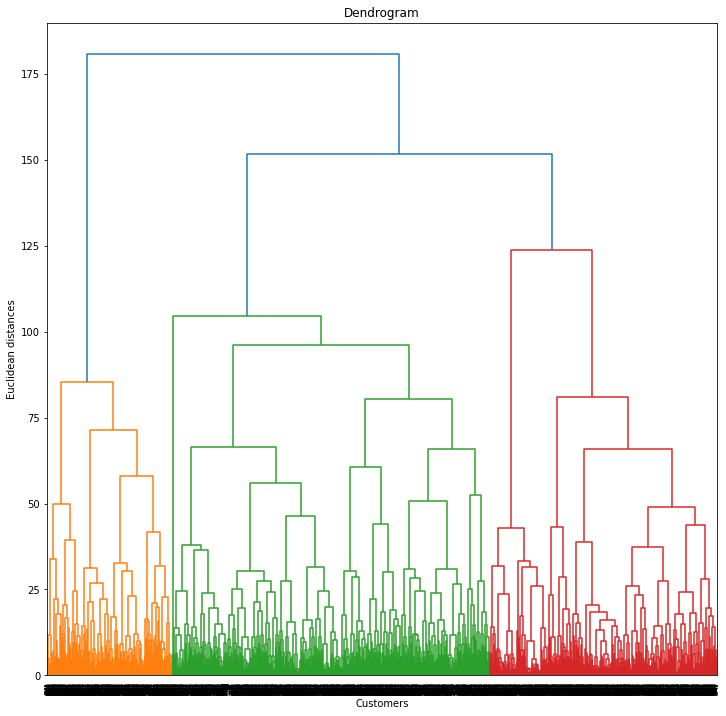

In [17]:
#### Finding K through Iteration
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
hier_clusterer = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster_labels = hier_clusterer.fit_predict(X)
data['cluster_label'] = cluster_labels

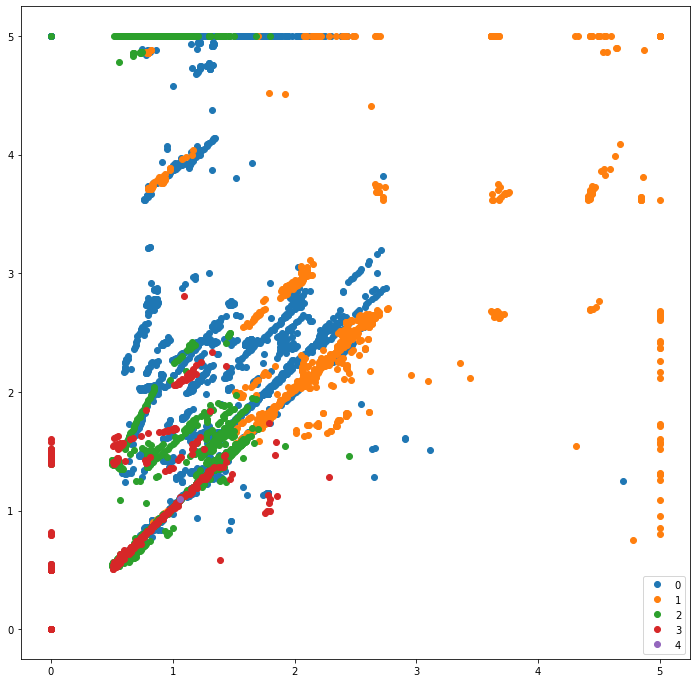

In [20]:
groups = data.groupby('cluster_label')
for name, group in groups:
    plt.plot(group["Category 1"], group["Category 2"], marker="o", linestyle="", label=name)
plt.legend()